<a href="https://colab.research.google.com/github/sumaiyaa0821/ETE456/blob/main/1608021_Exp03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment Name: Deep Learning Project on Diabetes Dataset**

**Course No:** ETE 456

**Name:** Sumaiya Binta Rowshon

**ID:** 1608021

**Objective:**
1. Classification problems using Deep Neural Network.
2. Develop DNN models using Tensorflow Framework

**Diabetes Dataset**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Download the data
!wget -O diabetes.csv  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-20 16:03:40--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-20 16:03:40--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf76bb8fbc94ecae3c6b743edaf.dl.dropboxusercontent.com/cd/0/inline/BcNKLgyODZV9JTxS5c7qaE-x2U_g6s5zcbZTwnO8X-hHIbzfr5NQM4b6szyJTfEmx7198D9PDEGXHvggzjU32f0BvIRW177dff44-d-eMSWyRF2jETI3Qws2k-q60OKNPapAii0VRGHPXKu4e_eqCEx-/file# [following]
--2021-12-20 16:03:40--  https://ucf76bb8fbc94ecae3c6b743edaf.dl.dropboxusercontent.com/cd/0/inline/BcNKLgyODZV9JTxS5c7qaE-x2U_g6s5zcbZTwnO8X-hHIbzfr5NQM4b6szyJTfEmx7198D9PDEGXHvggzjU32

In [4]:
"""importing the dataset """

dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
feature = dataset[[	'Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']]  # for independent
target = dataset[['Outcome']]   # for dependent

In [6]:
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


**Taking care of missing values**

In [8]:
from sklearn.impute import SimpleImputer

In [9]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") # imputer is an object of Imputer class 
imputer = imputer.fit(feature[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	, 'Age']])

In [11]:
feature[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") # imputer is an object of Imputer class 
imputer = imputer.fit(target[['Outcome']])

In [14]:
target[['Outcome']]= imputer.transform(target[['Outcome']])

In [15]:
target

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
763,0.0
764,0.0
765,0.0
766,1.0


In [16]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [17]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [18]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1,199,76,43,0,42.9,1.394,22
122,2,107,74,30,100,33.6,0.404,23
113,4,76,62,0,0,34.0,0.391,25
14,5,166,72,19,175,25.8,0.587,51
529,0,111,65,0,0,24.6,0.660,31
...,...,...,...,...,...,...,...,...
476,2,105,80,45,191,33.7,0.711,29
482,4,85,58,22,49,27.8,0.306,28
230,4,142,86,0,0,44.0,0.645,22
527,3,116,74,15,105,26.3,0.107,24


**Feature Scaling**

In [19]:
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

**Neural Network**

Building a Multilayer Neural Network with Tensorflow Keras.

In [20]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
#built the neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

**Training the model**

The model was trained on 80 epochs with a validation set of 20% of the train data. The validation set helps you check how well the model is learning during the training process, based on the loss function.

In [26]:
#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=80, validation_split=0.2)

Epoch 1/80
16/16 [==============================] - 1s 17ms/step - loss: 0.6408 - accuracy: 0.6823 - val_loss: 0.6006 - val_accuracy: 0.7561
Epoch 2/80
16/16 [==============================] - 0s 4ms/step - loss: 0.5631 - accuracy: 0.7495 - val_loss: 0.5520 - val_accuracy: 0.7805
Epoch 3/80
16/16 [==============================] - 0s 4ms/step - loss: 0.5219 - accuracy: 0.7617 - val_loss: 0.5205 - val_accuracy: 0.7805
Epoch 4/80
16/16 [==============================] - 0s 4ms/step - loss: 0.4956 - accuracy: 0.7699 - val_loss: 0.5029 - val_accuracy: 0.8049
Epoch 5/80
16/16 [==============================] - 0s 3ms/step - loss: 0.4781 - accuracy: 0.7699 - val_loss: 0.4938 - val_accuracy: 0.7967
Epoch 6/80
16/16 [==============================] - 0s 4ms/step - loss: 0.4672 - accuracy: 0.7678 - val_loss: 0.4916 - val_accuracy: 0.7886
Epoch 7/80
16/16 [==============================] - 0s 5ms/step - loss: 0.4594 - accuracy: 0.7821 - val_loss: 0.4909 - val_accuracy: 0.7967
Epoch 8/80
16/16 [=

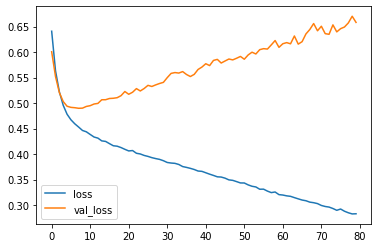

In [27]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

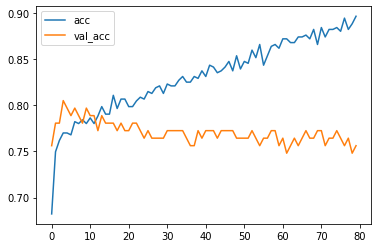

In [28]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')

plt.legend()

In [29]:
#Prediction
y_pred = model.predict(X_test)

In [30]:
y_test

,Outcome
661,1.0
122,0.0
113,0.0
14,1.0
529,0.0
...,...
476,1.0
482,0.0
230,1.0
527,0.0


In [31]:
y_pred

array([[9.96570587e-01],
       [3.10485363e-02],
       [8.28169584e-02],
       [3.69662106e-01],
       [5.50913811e-03],
       [2.43917108e-03],
       [9.36038971e-01],
       [8.60623777e-01],
       [6.36631846e-01],
       [3.37117434e-01],
       [8.57330084e-01],
       [8.45485687e-01],
       [1.49321198e-01],
       [5.48207164e-02],
       [4.23766971e-01],
       [2.17120260e-01],
       [9.75693226e-01],
       [3.20583582e-04],
       [4.43332613e-01],
       [5.39887488e-01],
       [7.85033941e-01],
       [3.20096314e-02],
       [2.98464388e-01],
       [3.53277743e-01],
       [1.47461891e-04],
       [7.84535229e-01],
       [1.21560261e-04],
       [9.94573832e-01],
       [7.62328506e-03],
       [8.05610418e-02],
       [4.01348591e-01],
       [1.27675533e-01],
       [1.53629184e-02],
       [8.17213178e-01],
       [3.06785107e-03],
       [8.20392966e-01],
       [3.42270374e-01],
       [2.56982446e-03],
       [8.20453584e-01],
       [9.61546421e-01],


In [32]:
y_pred = y_pred > 0.5
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [33]:
pred = y_pred.astype('uint8')
pred

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [34]:
import pandas as pd
from sklearn.metrics import classification_report
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       107
         1.0       0.61      0.64      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154



**Result Analysis**

In this project, Deep Neural Network model is used to classify the Diabetes dataset and classification evaluation matrices were used to evaluate the model. The classification report of the model is given below:

          precision    recall  f1-score   support

     0.0       0.83      0.83      0.83       107
     1.0       0.62      0.62      0.62        47
accuracy                           0.77       154

The accuracy of the used model is 77%.

**Discussion:**

The classification of the "Diabetes Dataset" using a Deep Neural Network model is completed in this project. The libraries for implementing the Deep Learning model were chosen first. Dense layers and Sigmoid activation function were used to create a sequential DNN model. The RMSProp optimizer was employed, as well as a binary cross-entrophy loss function. Precision, Recall, and F1-Score were utilized to evaluate the model using the Confusion Matrix. The correctness of the classification report library function was also tested. The dataset was preprocessed, such as encoded, missing file fillup, and feature scaling, before being trained in a DNN model.